In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from util import load_data, fdr, plot_report

In [2]:
x_train, x_test, y_train, y_test = load_data('var_30.csv')

In [3]:
x_train.head()

,ssn_name_count_14,ssn_name_dob_count_14,ssn_lastname_count_14,ssn_firstname_count_14,ssn_dob_count_0_by_30,name_dob_count_0_by_30,fulladdress_homephone_count_14,fulladdress_count_1_by_14,fulladdress_homephone_day_since,ssn_dob_day_since,...,fulladdress_count_0,name_dob_count_3,fulladdress_homephone_count_0_by_14,name_day_since,name_count_14,ssn_dob_count_0_by_14,ssn_lastname_count_0_by_14,ssn_firstname_count_0_by_14,ssn_name_day_since,address_count_1_by_7
238414,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.740949,-0.747606,...,-0.041351,-0.046415,0.120387,-0.524748,-0.159376,0.118004,0.123458,0.123528,-0.731931,0.103441
735820,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.986885,0.979154,...,-0.041351,-0.046415,0.120387,1.195746,-0.159376,0.118004,0.123458,0.123528,0.998743,0.103441
423500,2.043827,2.052704,2.043497,2.043376,-5.743168,-5.727967,2.004641,-7.704248,-1.500437,-1.506621,...,-0.041351,-0.046415,-7.579895,-1.281010,1.496715,-7.738716,-7.445204,-7.441340,-1.492667,-9.231273
405644,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.161840,-0.168857,...,-0.041351,-0.046415,0.120387,0.051901,-0.159376,0.118004,0.123458,0.123528,-0.151870,0.103441
448280,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.161840,-0.168857,...,-0.041351,-0.046415,0.120387,0.051901,-0.159376,0.118004,0.123458,0.123528,-0.151870,0.103441


In [4]:
lr = LogisticRegression(max_iter=10000)
params = {'C': [0.001,0.01,1],
          'class_weight': ['balanced',None],
         'n_jobs':[-1],
        'penalty':['l1'],
        'solver':['saga'],
        'multi_class':['ovr'],
         }
clf = GridSearchCV(lr, params, cv=2, refit='FDR', verbose=1,
                   n_jobs=4, scoring={'FDR': fdr, 'ROC': 'roc_auc'})
clf.fit(x_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 29.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 1],
                         'class_weight': ['balanced', None],
                         'multi_class': ['ovr'], 'n_jobs': [-1],
                         'penalty': ['l1'], 'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit='FDR', return_train_score=False,
             scoring={'FDR': <functio

In [5]:
print(f"The best parameters are {clf.best_params_} "
      f"with a score of {clf.best_score_:0.5f}")

The best parameters are {'C': 1, 'class_weight': 'balanced', 'multi_class': 'ovr', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'} with a score of 0.49974


In [6]:
pd.DataFrame(clf.cv_results_).filter(
    items=['mean_fit_time', 'mean_score_time',
           'params', 'mean_test_FDR','std_test_FDR',
           'rank_test_FDR', 'mean_test_ROC', 'std_test_ROC'])

,mean_fit_time,mean_score_time,params,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,60.640319,3.935961,"{'C': 0.001, 'class_weight': 'balanced', 'mult...",0.495206,0.005492,4,0.750766,0.002371
1,89.169411,1.385298,"{'C': 0.001, 'class_weight': None, 'multi_clas...",0.496426,0.005666,3,0.745413,0.003230
2,214.910278,4.031724,"{'C': 0.01, 'class_weight': 'balanced', 'multi...",0.498344,0.005143,2,0.749752,0.002691
3,475.596501,3.939471,"{'C': 0.01, 'class_weight': None, 'multi_class...",0.487622,0.006450,6,0.746029,0.002825
4,436.331375,3.902571,"{'C': 1, 'class_weight': 'balanced', 'multi_cl...",0.499738,0.005317,1,0.748305,0.002747
5,1097.055282,3.404398,"{'C': 1, 'class_weight': None, 'multi_class': ...",0.489888,0.005404,5,0.746627,0.002722


FDR: 0.500513522766176

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197079
           1       0.20      0.52      0.28      2921

    accuracy                           0.96    200000
   macro avg       0.59      0.74      0.63    200000
weighted avg       0.98      0.96      0.97    200000



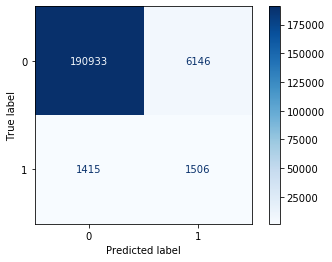

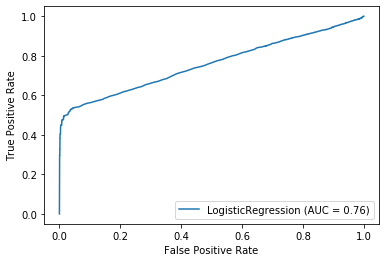

In [7]:
lr = LogisticRegression(max_iter=1000, **clf.best_params_).fit(x_train, y_train)
plot_report(lr, x_test, y_test)